# Just a playground to test my ideas

In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [238]:
# Read data from file
df = pd.read_csv('epa-sea-level.csv')
df["Year"]

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
129    2009
130    2010
131    2011
132    2012
133    2013
Name: Year, Length: 134, dtype: int64

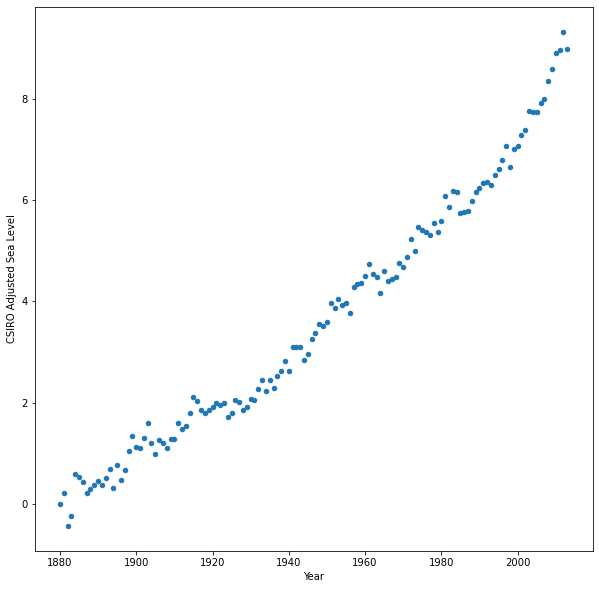

In [239]:
# Create scatter plot.
# Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axis.
fig = df.plot.scatter(x="Year", y="CSIRO Adjusted Sea Level", figsize=(10, 10))

In [240]:
# Create first line of best fit
# Use the linregress function from scipi.stats to get the slope and y-intercept of the line of best fit.
# Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
slope1880, intercept1880, x, x, x = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
# Create second line of best fit
slope2000, intercept2000, x, x, x = linregress(df[df["Year"] >= 2000]["Year"], df[df["Year"] >= 2000]["CSIRO Adjusted Sea Level"])

In [241]:
# Add years until 2050
real_data_limit = df["Year"].max()
for i in range(real_data_limit - df["Year"].min(), 2050 - df["Year"].min() + 1):
    df.loc[i] = [i + df["Year"].min(),np.nan,np.nan,np.nan,np.nan]
df["LinReg1880"] = intercept1880 + df["Year"].values * slope1880
df["LinReg2000"] = intercept2000 + df["Year"].values * slope2000
df.mask(df["CSIRO Adjusted Sea Level"] > real_data_limit)
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,LinReg1880,LinReg2000
0,1880.0,0.000000,-0.952756,0.952756,NaN,-0.542124,-12.910193
1,1881.0,0.220472,-0.732283,1.173228,NaN,-0.479079,-12.743766
2,1882.0,-0.440945,-1.346457,0.464567,NaN,-0.416035,-12.577338
3,1883.0,-0.232283,-1.129921,0.665354,NaN,-0.352990,-12.410911
4,1884.0,0.590551,-0.283465,1.464567,NaN,-0.289946,-12.244484
...,...,...,...,...,...,...,...
166,2046.0,NaN,NaN,NaN,NaN,9.923277,14.716734
167,2047.0,NaN,NaN,NaN,NaN,9.986322,14.883162
168,2048.0,NaN,NaN,NaN,NaN,10.049366,15.049589
169,2049.0,NaN,NaN,NaN,NaN,10.112411,15.216016


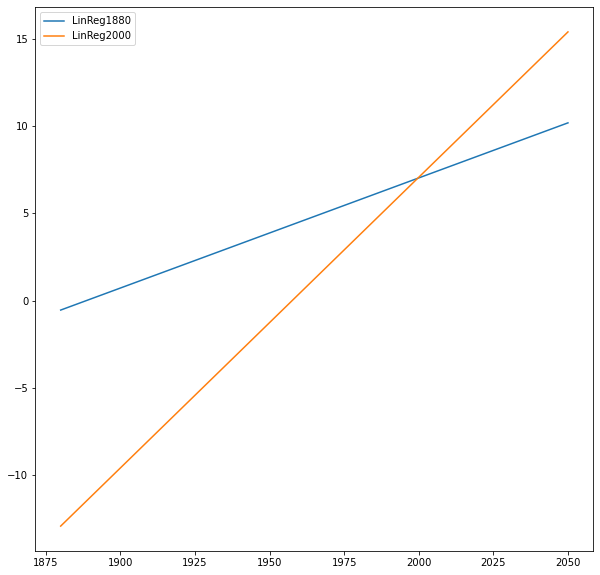

In [242]:
df2 = pd.DataFrame({
   "LinReg1880" : list(df["LinReg1880"].values),
   "LinReg2000" : list(df["LinReg2000"].values)
   }, index=list(df["Year"].values))
lines = df2.plot.line(figsize=(10, 10))

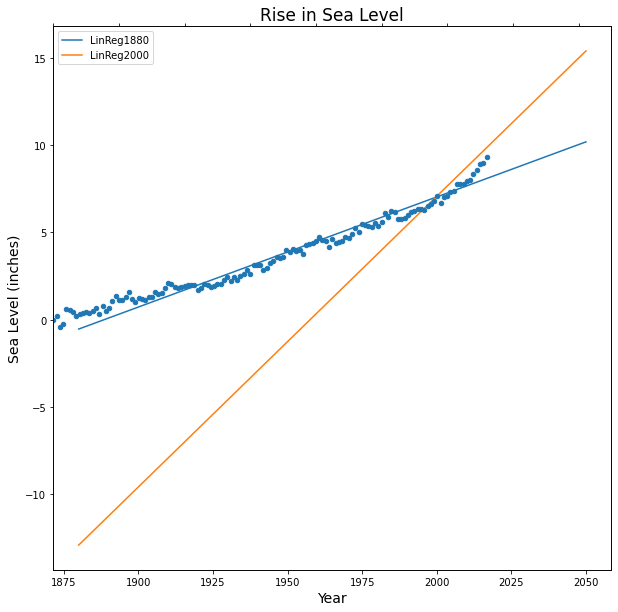

In [252]:
fig, ax = plt.subplots(figsize=(10, 10))
# optionally make log scale
# ax.set_yscale("log", nonposy='clip')
# create shared y axes
ax2 = ax.twiny()
df2.plot(kind="line", ax=ax)
df.plot(kind="scatter", x="Year", y="CSIRO Adjusted Sea Level", ax=ax2)
#ax2.xaxis.get_major_formatter().set_useOffset(False)
# remove upper axis ticklabels
ax2.set_xticklabels([])
# set the limits of the upper axis to match the lower axis ones
ax2.set_xlim(df["Year"].min(),df["Year"].max())
ax.set_title("Rise in Sea Level", fontsize="17")
ax.set_xlabel("Year", fontsize="14")
ax.set_ylabel("Sea Level (inches)", fontsize="14")
ax2.set_xlabel("", fontsize="14")
plt.show()

In [244]:
# Save plot and return data for testing (DO NOT MODIFY)
